In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA, IncrementalPCA

In [2]:
'''
Retrieve and load the mnist_784 dataset of 70,000 instances
'''
mnist = fetch_openml('mnist_784', version=1, as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [4]:
X, y = mnist['data'], mnist['target']

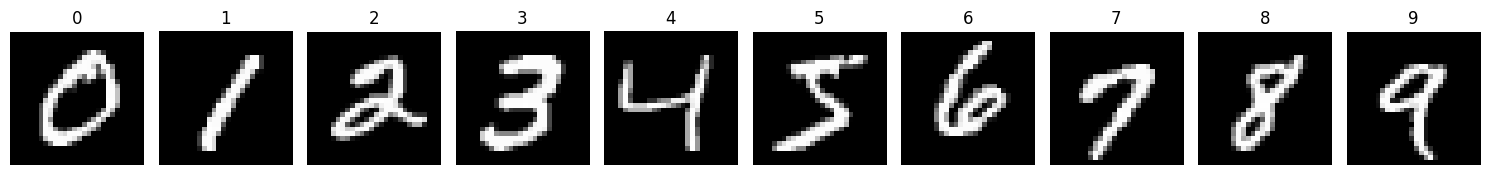

In [5]:
'''
Display each digit.
'''

fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for digit in range(10):
  # the first index where the target is equal to the current digit
  index = np.where(y == str(digit))[0][0]

  axes[digit].imshow(X.iloc[index].values.reshape(28, 28), cmap='gray')
  axes[digit].set_title(f'{digit}')

  axes[digit].axis('off')

plt.tight_layout()
plt.show()

In [6]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

In [7]:
X_2d.shape

(70000, 2)

In [8]:
'''
Use PCA to retrieve the 1st and 2nd principal component and output their explained variance ratio.
'''
pca_2d.explained_variance_ratio_

array([0.09746116, 0.07155445])

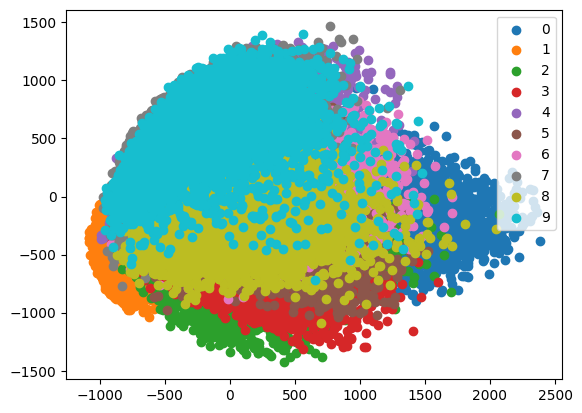

In [9]:
'''
Plot the projections of the and principal component onto a 2D hyperplane.
'''
for label in range(10):
  plt.scatter(X_2d[y == str(label), 0], X_2d[y == str(label), 1], label=label)

plt.legend()
plt.show()

In [10]:
'''
Use Incremental PCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions.
'''
n_components = 154

ipca = IncrementalPCA(n_components=n_components)

n_batches = 100
for batch in np.array_split(X, n_batches):
  ipca.partial_fit(batch)

X_reduced = ipca.transform(X)

X_reduced.shape

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(70000, 154)

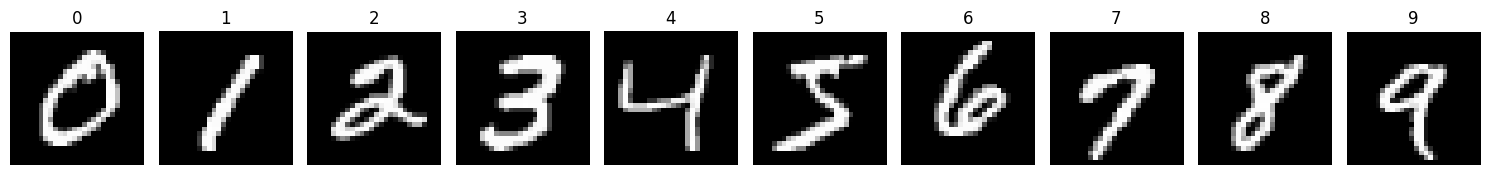

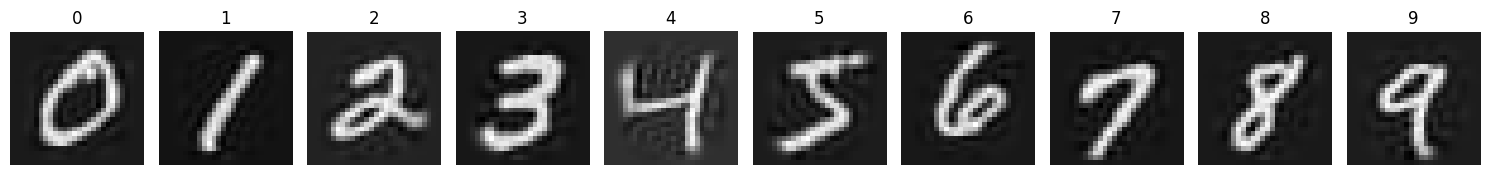

In [11]:
'''
Display the original and compressed digits from (5).
'''
# original
fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for digit in range(10):
  # the first index where the target is equal to the current digit
  index = np.where(y == str(digit))[0][0]

  axes[digit].imshow(X.iloc[index].values.reshape(28, 28), cmap='gray')
  axes[digit].set_title(f'{digit}')

  axes[digit].axis('off')

plt.tight_layout()
plt.show()

# inversed
X_reduced_inversed = ipca.inverse_transform(X_reduced)

fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for digit in range(10):
  index = np.where(y == str(digit))[0][0]

  axes[digit].imshow(X_reduced_inversed[index].reshape(28, 28), cmap='gray')
  axes[digit].set_title(f'{digit}')

  axes[digit].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
'''
Create a video discussing the code and result for each question. Discuss challenges you confronted and solutions to overcoming them, if applicable
'''